<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> Decission Tree**</span><br>





<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree



In [2]:
df = pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')

In [3]:
df  

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
0,0,0.722892,0.021002,0.500000,0.291667,0.52,0.041667,0.239376,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.257028,0.000900,0.333333,0.375000,0.76,0.208333,0.196506,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,0.353414,0.247225,0.000000,0.583333,0.94,0.250000,0.283608,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.429719,0.007401,0.333333,0.833333,0.10,0.291667,0.095155,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.867470,0.845785,0.000000,0.125000,0.10,0.250000,0.549746,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
X = df.drop('CarbonEmission', axis=1)
y = df['CarbonEmission']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(oob_score=True, random_state=42)

In [13]:
# unseen data training score
oob_score = model.oob_score_
print(oob_score)    

0.9143253169549296


In [7]:
predictions = model.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")


Mean Absolute Error (MAE): 0.02702759137653327
Mean Squared Error (MSE): 0.001265184343328195
Root Mean Squared Error (RMSE): 0.03556942989883581
R-squared (R2 ): 0.9207321681134875


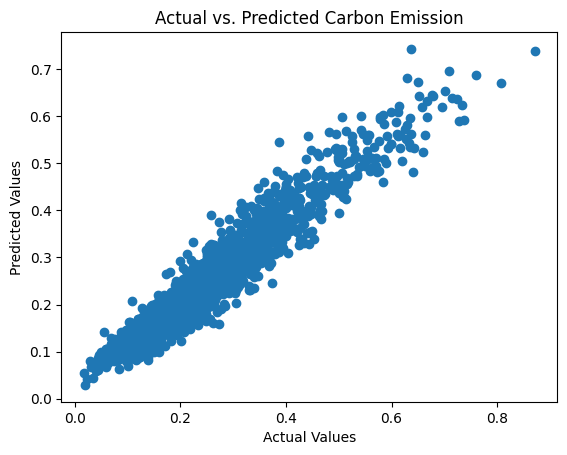

In [9]:
import matplotlib.pyplot as plt
# plot actual vs predicted      
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Carbon Emission')
plt.show()
